# Activation Maximization

## Visualizing Dense layer

In [1]:
%reload_ext autoreload
%autoreload 2

import tensorflow as tf
from tf_keras_vis.utils import print_gpus

print_gpus()

1 Physical GPUs, 1 Logical GPU


### Load tf.keras.Model

This tutorial use VGG16 model in tf.keras but if you want to use other tf.keras.Models, you can do so by modifing section below.

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Visualizing a specific output category

ActivationMaximization will maximize the value that is computed by the loss function passed as argument. Here, we try to visualize a category as defined No.20 (ouzel) of imagenet.

> [!NOTE]
> The softmax activation function which is applied to model's last layer may obstruct generating shape images, so that you need to replace the function to a linear function using `model_modifier`.

Steps: 100	Losses: [110.51480865478516],	Regularizations: [('TotalVariation', 83.30380249023438), ('L2Norm', 0.02561982348561287)]
Steps: 200	Losses: [201.20880126953125],	Regularizations: [('TotalVariation', 94.41551208496094), ('L2Norm', 0.02549225091934204)]


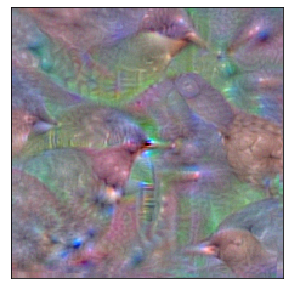

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras import backend as K
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.utils.callbacks import Print

# Define modifier to replace a softmax function of the last layer to a linear function.
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

# Create Activation Maximization object
activation_maximization = ActivationMaximization(model, model_modifier)

# Define loss function. 20 is the imagenet index corresponding to ouzel.
loss = lambda x: K.mean(x[:, 20])

# Generate max activation with debug printing
activation = activation_maximization(loss, callbacks=[Print(interval=100)])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

Let's see if we can get better results with more iterations.

Steps: 100	Losses: [135.98158264160156],	Regularizations: [('TotalVariation', 83.65283966064453), ('L2Norm', 0.025614144280552864)]
Steps: 200	Losses: [221.48684692382812],	Regularizations: [('TotalVariation', 103.23441314697266), ('L2Norm', 0.025464940816164017)]
Steps: 300	Losses: [223.00698852539062],	Regularizations: [('TotalVariation', 100.07350158691406), ('L2Norm', 0.025365594774484634)]
Steps: 400	Losses: [238.1101531982422],	Regularizations: [('TotalVariation', 98.50422668457031), ('L2Norm', 0.0252983495593071)]
Steps: 500	Losses: [285.9947204589844],	Regularizations: [('TotalVariation', 110.83332824707031), ('L2Norm', 0.025216003879904747)]


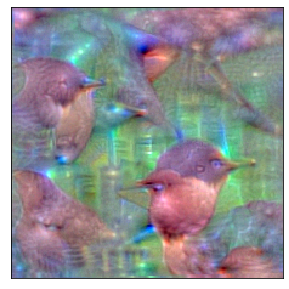

In [4]:
from tf_keras_vis.utils.callbacks import GifGenerator

# Do 500 iterations and Generate an optimizing animation
activation = activation_maximization(loss,
                                     steps=512,
                                     callbacks=[ Print(interval=100),
                                                 GifGenerator('images/activation_maximization')])
image = activation[0].astype(np.uint8)

f, ax = plt.subplots(figsize=(10, 5), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
plt.show()

The animation gif is below. We can see the vision that was constructed the input that was being maximized.

In [5]:
from IPython.display import HTML
HTML('<img src="./images/activation_maximization.0.gif">')